In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_excel('../machine_learning_examples/linear_regression_class/mlr02.xls')
X = df.as_matrix()
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


*** No CODEPAGE record, no encoding_override: will use 'ascii'


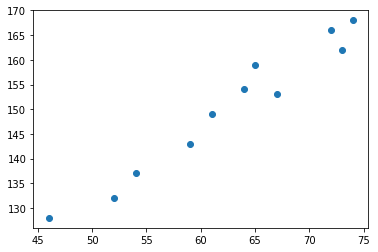

In [2]:
# X-axis = Age in years
# Y-axis = systolic bloodpressure
plt.scatter(X[:,1], X[:,0])

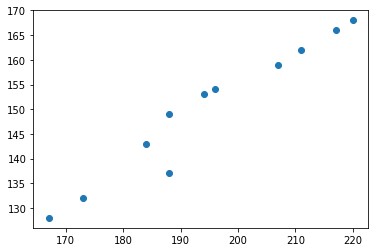

In [3]:
# X-axis = Weight in pounds
# Y-axis = systolic bloodpressure
plt.scatter(X[:,2], X[:,0])

In [6]:
df['ones'] = 1
Y = df['X1']
X = df[['X2', 'X3', 'ones']]
X2only = df[['X2', 'ones']]
X3only = df[['X3', 'ones']]

In [7]:
def get_r2(X, Y):
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Y_hat = X.dot(w)
    
    d1 = Y - Y_hat
    d2 = Y - Y.mean()
    
    return 1 - d1.dot(d1)/d2.dot(d2)

In [9]:
print("R2 for X2 only",get_r2(X2only, Y))
print("R2 for X3 only",get_r2(X3only, Y))
print("R2 for X2 and X3",get_r2(X, Y))

R2 for X2 only 0.957840720815
R2 for X3 only 0.941995208529
R2 for X2 and X3 0.97684710415


In [15]:
# What if we added a dimension that was pure noise? What happens to the Rsquared?
df['noise'] = np.random.randn(len(df['ones']))

In [28]:
#NOTE: Adding noise improved R2!!
print("R2 for X2 and noise",get_r2(pd.concat([X2only,df['noise']],axis=1), Y))
print("R2 for X3 and noise",get_r2(pd.concat([X3only,df['noise']],axis=1), Y))
print("R2 for X2, X3, and noise",get_r2(pd.concat([X,df['noise']],axis=1), Y))

R2 for X2 and noise 0.958021179169
R2 for X3 and noise 0.942691967858
R2 for X2, X3, and noise 0.97694907983
